# Neural Network Training

In [1]:
import numpy as np
import pandas as pd

from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.stats import kurtosis
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from datasets.HiggsBosonDataset import HiggsBosonDataset
from datasets.MappingDataset import MappingDataset
%load_ext autoreload
%autoreload 2
from utils import *

In [15]:
# Import Dataset
mapping = MappingDataset()

## Mapping Dataset

In [16]:
#Split Train data to train and validation Data
X_train, y_train = mapping.get_train_data()
X_test, y_test = mapping.get_test_data()

### Get Project Data

In [4]:
pca = PCA(0.9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test) 
print(X_test_pca.shape[1])

ica = FastICA(14,tol=0.2)
X_train_ica = ica.fit_transform(X_train)
X_test_ica = ica.transform(X_test) 

grp = GaussianRandomProjection(n_components=14)
X_train_grp = grp.fit_transform(X_train)
X_test_grp = grp.transform(X_test) 

tree_clf = ExtraTreesClassifier(n_estimators=100)
tree_clf = tree_clf.fit(X_train,y_train)
selector = SelectFromModel(tree_clf, prefit=True)
X_train_tree = selector.transform(X_train)
X_test_tree = selector.transform(X_test)

20


## Neural Net on Original Dataset

In [11]:
# Hyperparameter Tuning
params = {'alpha':[0.001,0.01,0.1],'learning_rate_init':[0.001,0.01,0.1]}
clf = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500)

clf = best_hyperparameter_search(clf, X_train, y_train, params, scoring='f1_macro', cv=3, graph=False)

/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average

{'alpha': 0.1, 'learning_rate_init': 0.01} gave the best score with 0.680007088884568 mean test f1_macro
mean fit time of 3.0321153004964194 +- 0.38776995599997993secs
mean predict time 0.006927013397216797 +- 0.0009262045977257476secs


Fit time:4.739266139999998 secs for 10545 instances (2225.0280293395813 inst/per sec)
Predict time:0.0012301650000026143 secs for 300 instances (243869.72479249732 inst/per sec)


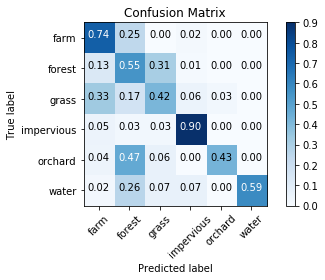

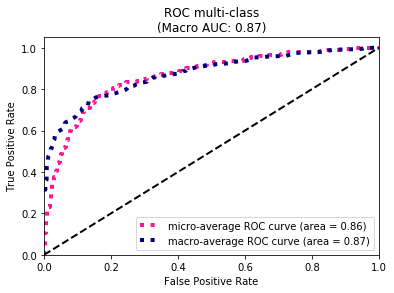

Train F1 Macro:94.70877724663626%
Test F1 Macro:61.80292693120144%


In [5]:
clf = MLPClassifier((100,50), alpha=0.1, learning_rate_init=0.01, max_iter=500)
start = timer()
clf = clf.fit(X_train, y_train)
fit_time = timer() - start
print('Fit time:{} secs for {} instances ({} inst/per sec)'.format(fit_time,y_train.shape[0],y_train.shape[0]/fit_time))
start = timer()
y_pred = clf.predict(X_test)
pred_time = timer() - start
print('Predict time:{} secs for {} instances ({} inst/per sec)'.format(pred_time,y_test.shape[0],y_test.shape[0]/pred_time))
plot_confusion_matrix(y_pred, y_test, mapping.get_classes(), normalize=True)
y_score = clf.predict_proba(X_test)

plot_roc_curve(y_score, y_test, X_test, estimator=clf, classes = mapping.get_classes())

print('Train F1 Macro:{}%'.format(f1_score(y_train,clf.predict(X_train),average='macro',labels=range(len(mapping.get_classes())))*100))
print('Test F1 Macro:{}%'.format(f1_score(y_test,y_pred,average='macro',labels=range(len(mapping.get_classes())))*100))

## PCA

In [ ]:
# Hyperparameter Tuning
params = {'alpha':[0.001,0.01,0.1],'learning_rate_init':[0.001,0.01,0.1]}
clf = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500)

clf = best_hyperparameter_search(clf, X_train_pca, y_train, params, scoring='f1_macro', cv=3, graph=False)

Fit time:14.859614484000005 secs for 10545 instances (709.6415597695527 inst/per sec)
Predict time:0.0008390329999912183 secs for 300 instances (357554.4704476939 inst/per sec)


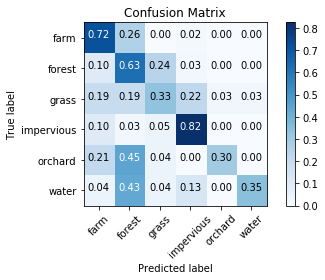

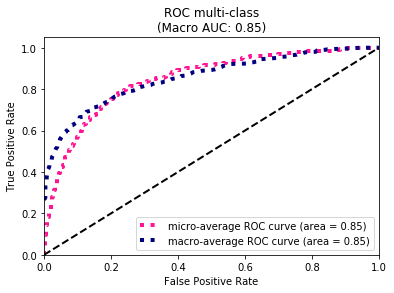

Train F1 Macro:98.2480179248483%
Test F1 Macro:52.673169352327676%


In [6]:
clf = MLPClassifier((100,50), alpha=0.1, learning_rate_init=0.001, max_iter=500)
start = timer()
clf = clf.fit(X_train_pca, y_train)
fit_time = timer() - start
print('Fit time:{} secs for {} instances ({} inst/per sec)'.format(fit_time,y_train.shape[0],y_train.shape[0]/fit_time))
start = timer()
y_pred = clf.predict(X_test_pca)
pred_time = timer() - start
print('Predict time:{} secs for {} instances ({} inst/per sec)'.format(pred_time,y_test.shape[0],y_test.shape[0]/pred_time))
plot_confusion_matrix(y_pred, y_test, mapping.get_classes(), normalize=True)
y_score = clf.predict_proba(X_test_pca)

plot_roc_curve(y_score, y_test, X_test_pca, estimator=clf, classes = mapping.get_classes())

print('Train F1 Macro:{}%'.format(f1_score(y_train,clf.predict(X_train_pca),average='macro',labels=range(len(mapping.get_classes())))*100))
print('Test F1 Macro:{}%'.format(f1_score(y_test,y_pred,average='macro',labels=range(len(mapping.get_classes())))*100))

## ICA

In [9]:
# Hyperparameter Tuning
params = {'alpha':[0.001,0.01,0.1],'learning_rate_init':[0.001,0.01,0.1]}
clf = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500)

clf = best_hyperparameter_search(clf, X_train_ica, y_train, params, scoring='f1_macro', cv=3, graph=False)

/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no 

/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


{'alpha': 0.001, 'learning_rate_init': 0.01} gave the best score with 0.6412525404612911 mean test f1_macro
mean fit time of 14.554140647252401 +- 2.735756242144226secs
mean predict time 0.007873296737670898 +- 0.0005398035675996696secs


Fit time:10.302348958 secs for 10545 instances (1023.5529822363061 inst/per sec)
Predict time:0.0012706109999989224 secs for 300 instances (236106.88086302925 inst/per sec)


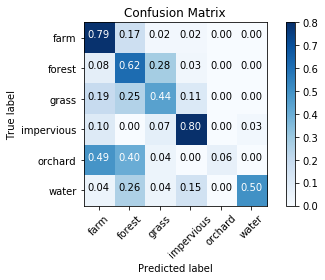

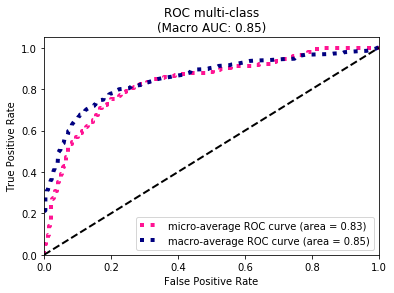

Train F1 Macro:86.45082808516499%
Test F1 Macro:51.22138201327208%


In [5]:
clf = MLPClassifier((100,50), alpha=0.001, learning_rate_init=0.01, max_iter=500)
start = timer()
clf = clf.fit(X_train_ica, y_train)
fit_time = timer() - start
print('Fit time:{} secs for {} instances ({} inst/per sec)'.format(fit_time,y_train.shape[0],y_train.shape[0]/fit_time))
start = timer()
y_pred = clf.predict(X_test_ica)
pred_time = timer() - start
print('Predict time:{} secs for {} instances ({} inst/per sec)'.format(pred_time,y_test.shape[0],y_test.shape[0]/pred_time))
plot_confusion_matrix(y_pred, y_test, mapping.get_classes(), normalize=True)
y_score = clf.predict_proba(X_test_ica)

plot_roc_curve(y_score, y_test, X_test_ica, estimator=clf, classes = mapping.get_classes())

print('Train F1 Macro:{}%'.format(f1_score(y_train,clf.predict(X_train_ica),average='macro',labels=range(len(mapping.get_classes())))*100))
print('Test F1 Macro:{}%'.format(f1_score(y_test,y_pred,average='macro',labels=range(len(mapping.get_classes())))*100))

## Random Projection

In [8]:
# Hyperparameter Tuning
params = {'alpha':[0.001,0.01,0.1],'learning_rate_init':[0.001,0.01,0.1]}
clf = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500)

clf = best_hyperparameter_search(clf, X_train_grp, y_train, params, scoring='f1_macro', cv=3, graph=False)

/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average

{'alpha': 0.1, 'learning_rate_init': 0.01} gave the best score with 0.6315538659042244 mean test f1_macro
mean fit time of 3.8567349910736084 +- 0.6230364692841456secs
mean predict time 0.006508986155192058 +- 0.00047473592856330947secs


Fit time:3.9562665529999776 secs for 10545 instances (2665.3916915693876 inst/per sec)
Predict time:0.0011021870000149647 secs for 300 instances (272186.11723412346 inst/per sec)


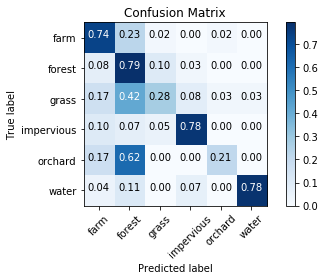

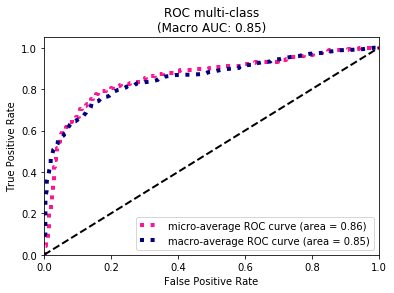

Train F1 Macro:92.21398122559347%
Test F1 Macro:60.18333893896182%


In [9]:
clf = MLPClassifier((100,50), alpha=0.1, learning_rate_init=0.01, max_iter=500)
start = timer()
clf = clf.fit(X_train_grp, y_train)
fit_time = timer() - start
print('Fit time:{} secs for {} instances ({} inst/per sec)'.format(fit_time,y_train.shape[0],y_train.shape[0]/fit_time))
start = timer()
y_pred = clf.predict(X_test_grp)
pred_time = timer() - start
print('Predict time:{} secs for {} instances ({} inst/per sec)'.format(pred_time,y_test.shape[0],y_test.shape[0]/pred_time))
plot_confusion_matrix(y_pred, y_test, mapping.get_classes(), normalize=True)
y_score = clf.predict_proba(X_test_grp)

plot_roc_curve(y_score, y_test, X_test_grp, estimator=clf, classes = mapping.get_classes())

print('Train F1 Macro:{}%'.format(f1_score(y_train,clf.predict(X_train_grp),average='macro',labels=range(len(mapping.get_classes())))*100))
print('Test F1 Macro:{}%'.format(f1_score(y_test,y_pred,average='macro',labels=range(len(mapping.get_classes())))*100))

## Ensemble Tree Selection

In [10]:
# Hyperparameter Tuning
params = {'alpha':[0.001,0.01,0.1],'learning_rate_init':[0.001,0.01,0.1]}
clf = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500)

clf = best_hyperparameter_search(clf, X_train_tree, y_train, params, scoring='f1_macro', cv=3, graph=False)

/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average

{'alpha': 0.1, 'learning_rate_init': 0.01} gave the best score with 0.6324020897206759 mean test f1_macro
mean fit time of 4.695001840591431 +- 1.0430455075608942secs
mean predict time 0.006491899490356445 +- 0.0007957691453694745secs


Fit time:2.861635824999894 secs for 10545 instances (3684.955265053823 inst/per sec)
Predict time:0.0016718470000114394 secs for 300 instances (179442.25757377755 inst/per sec)


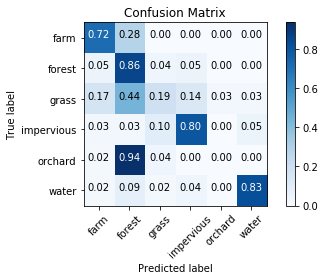

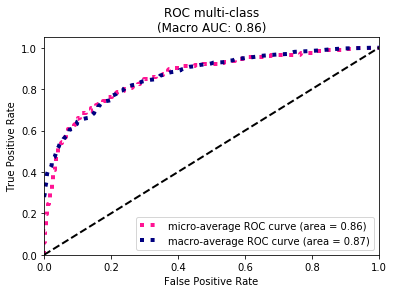

Train F1 Macro:78.16002082054548%
Test F1 Macro:53.91872142435359%


In [11]:
clf = MLPClassifier((100,50), alpha=0.1, learning_rate_init=0.01, max_iter=500)
start = timer()
clf = clf.fit(X_train_tree, y_train)
fit_time = timer() - start
print('Fit time:{} secs for {} instances ({} inst/per sec)'.format(fit_time,y_train.shape[0],y_train.shape[0]/fit_time))
start = timer()
y_pred = clf.predict(X_test_tree)
pred_time = timer() - start
print('Predict time:{} secs for {} instances ({} inst/per sec)'.format(pred_time,y_test.shape[0],y_test.shape[0]/pred_time))
plot_confusion_matrix(y_pred, y_test, mapping.get_classes(), normalize=True)
y_score = clf.predict_proba(X_test_tree)

plot_roc_curve(y_score, y_test, X_test_tree, estimator=clf, classes = mapping.get_classes())

print('Train F1 Macro:{}%'.format(f1_score(y_train,clf.predict(X_train_tree),average='macro',labels=range(len(mapping.get_classes())))*100))
print('Test F1 Macro:{}%'.format(f1_score(y_test,y_pred,average='macro',labels=range(len(mapping.get_classes())))*100))

# Clusters as Features

## KMeans

In [5]:
kmeans = KMeans(n_clusters=7)

X_train_kmeans = get_hot_encoding_from_cluster(kmeans.fit_predict(X_train))
X_test_kmeans = get_hot_encoding_from_cluster(kmeans.predict(X_test))

In [6]:
# Hyperparameter Tuning
params = {'alpha':[0.0000001,0.000001,0.00001],'learning_rate_init':[0.0000001,0.000001,0.00001]}
clf = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500)

clf = best_hyperparameter_search(clf, X_train_kmeans, y_train, params, scoring='f1_macro', cv=3, graph=False)

/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'p

/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conver

/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average

{'alpha': 1e-07, 'learning_rate_init': 1e-05} gave the best score with 0.3691805391323561 mean test f1_macro
mean fit time of 21.946455637613933 +- 1.7616724255522875secs
mean predict time 0.0063470204671223955 +- 0.0009193347930732416secs


Fit time:21.987141908000012 secs for 10545 instances (479.59848733969403 inst/per sec)
Predict time:0.0010637059999680787 secs for 300 instances (282032.8173470892 inst/per sec)


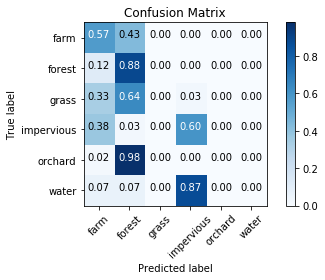

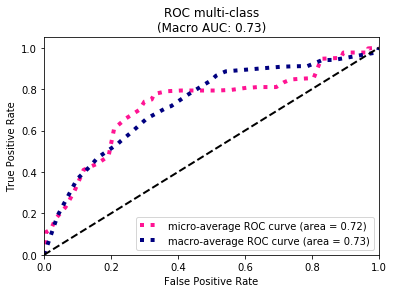

Train F1 Macro:36.97277632302079%
Test F1 Macro:25.214149495992316%


/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
clf = MLPClassifier((100,50), alpha=1e-7, learning_rate_init=1e-5, max_iter=500)
start = timer()
clf = clf.fit(X_train_kmeans, y_train)
fit_time = timer() - start
print('Fit time:{} secs for {} instances ({} inst/per sec)'.format(fit_time,y_train.shape[0],y_train.shape[0]/fit_time))
start = timer()
y_pred = clf.predict(X_test_kmeans)
pred_time = timer() - start
print('Predict time:{} secs for {} instances ({} inst/per sec)'.format(pred_time,y_test.shape[0],y_test.shape[0]/pred_time))
plot_confusion_matrix(y_pred, y_test, mapping.get_classes(), normalize=True)
y_score = clf.predict_proba(X_test_kmeans)

plot_roc_curve(y_score, y_test, X_test_kmeans, estimator=clf, classes = mapping.get_classes())

print('Train F1 Macro:{}%'.format(f1_score(y_train,clf.predict(X_train_kmeans),average='macro',labels=range(len(mapping.get_classes())))*100))
print('Test F1 Macro:{}%'.format(f1_score(y_test,y_pred,average='macro',labels=range(len(mapping.get_classes())))*100))

## Expectaction Maximazation

In [22]:
gmm = GaussianMixture(n_components=10)

X_train_gmm = get_hot_encoding_from_cluster(gmm.fit_predict(X_train))
X_test_gmm = get_hot_encoding_from_cluster(gmm.fit_predict(X_test))

In [12]:
# Hyperparameter Tuning
params = {'alpha':[0.0000001,0.000001,0.00001],'learning_rate_init':[0.0000001,0.000001,0.00001]}
clf = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500)

clf = best_hyperparameter_search(clf, X_train_gmm, y_train, params, scoring='f1_macro', cv=3, graph=False)

/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'p

/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conver

/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average

{'alpha': 1e-07, 'learning_rate_init': 1e-05} gave the best score with 0.4804223237584012 mean test f1_macro
mean fit time of 19.649279673894245 +- 0.855221148889476secs
mean predict time 0.006873369216918945 +- 0.0012091315596638227secs


Fit time:23.414279576000354 secs for 10545 instances (450.3661949440729 inst/per sec)
Predict time:0.00194408100014698 secs for 300 instances (154314.55786940918 inst/per sec)


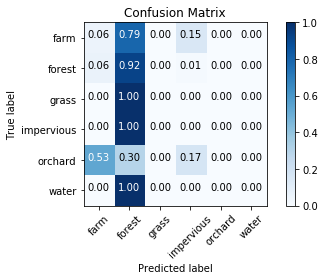

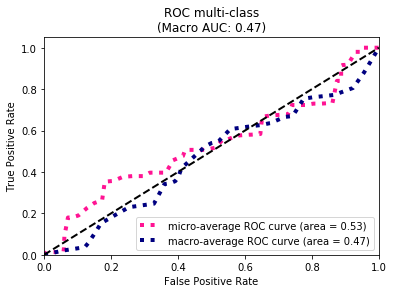

Train F1 Macro:39.93061229668304%
Test F1 Macro:8.479863868406126%


/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
clf = MLPClassifier((100,50), alpha=1e-7, learning_rate_init=1e-5, max_iter=500)
start = timer()
clf = clf.fit(X_train_gmm, y_train)
fit_time = timer() - start
print('Fit time:{} secs for {} instances ({} inst/per sec)'.format(fit_time,y_train.shape[0],y_train.shape[0]/fit_time))
start = timer()
y_pred = clf.predict(X_test_gmm)
pred_time = timer() - start
print('Predict time:{} secs for {} instances ({} inst/per sec)'.format(pred_time,y_test.shape[0],y_test.shape[0]/pred_time))
plot_confusion_matrix(y_pred, y_test, mapping.get_classes(), normalize=True)
y_score = clf.predict_proba(X_test_gmm)

plot_roc_curve(y_score, y_test, X_test_gmm, estimator=clf, classes = mapping.get_classes())

print('Train F1 Macro:{}%'.format(f1_score(y_train,clf.predict(X_train_gmm),average='macro',labels=range(len(mapping.get_classes())))*100))
print('Test F1 Macro:{}%'.format(f1_score(y_test,y_pred,average='macro',labels=range(len(mapping.get_classes())))*100))